# Minimal three node network

Here, we are going to create a network with three nodes, three lines and one generator. We then solve the non-linear power flow using a Newton-Raphson.

In [43]:
import pypsa
import numpy as np

In [44]:
network = pypsa.Network()

Add three buses

In [45]:
n_buses = 3

for i in range(n_buses):
    network.add("Bus", "My bus {}".format(i), v_nom=20.0)

network.buses

attribute,v_nom,type,x,y,carrier,unit,v_mag_pu_set,v_mag_pu_min,v_mag_pu_max,control,sub_network
Bus,,,,,,,,,,,
My bus 0,20.0,,0.0,0.0,AC,None,1.0,0.0,inf,PQ,
My bus 1,20.0,,0.0,0.0,AC,None,1.0,0.0,inf,PQ,
My bus 2,20.0,,0.0,0.0,AC,None,1.0,0.0,inf,PQ,


Add three lines in a ring

In [46]:
for i in range(n_buses):
    network.add(
        "Line",
        "My line {}".format(i),
        bus0="My bus {}".format(i),
        bus1="My bus {}".format((i + 1) % n_buses),
        x=0.1,
        r=0.01,
    )

network.lines

attribute,bus0,bus1,type,x,r,g,b,s_nom,s_nom_extendable,s_nom_min,...,v_ang_min,v_ang_max,sub_network,x_pu,r_pu,g_pu,b_pu,x_pu_eff,r_pu_eff,s_nom_opt
Line,,,,,,,,,,,,,,,,,,,,,
My line 0,My bus 0,My bus 1,,0.1,0.01,0.0,0.0,0.0,False,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
My line 1,My bus 1,My bus 2,,0.1,0.01,0.0,0.0,0.0,False,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
My line 2,My bus 2,My bus 0,,0.1,0.01,0.0,0.0,0.0,False,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Add a generator at bus 0

In [47]:
network.add("Generator", "My gen", bus="My bus 0", p_set=100, control="PQ", marginal_cost= 1)

network.generators

attribute,bus,control,type,p_nom,p_nom_extendable,p_nom_min,p_nom_max,p_min_pu,p_max_pu,p_set,...,shut_down_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,p_nom_opt
Generator,,,,,,,,,,,,,,,,,,,,,
My gen,My bus 0,PQ,,0.0,False,0.0,inf,0.0,1.0,100.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0


In [48]:
network.generators.p_set

Generator
My gen    100.0
Name: p_set, dtype: float64

Add a load at bus 1

In [49]:
network.add("Load", "My load", bus="My bus 1", p_set=100)

network.loads

attribute,bus,carrier,type,p_set,q_set,sign
Load,,,,,,
My load,My bus 1,,,100.0,0.0,-1.0


In [50]:
network.loads.p_set

Load
My load    100.0
Name: p_set, dtype: float64

Fix the reactive power of the load

In [51]:
network.loads.q_set = 100.0

Do a Newton-Raphson power flow

In [52]:
network.pf()

INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object', name='snapshot')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.048869 seconds


{'n_iter': SubNetwork  0
 snapshot     
 now         3,
 'error': SubNetwork             0
 snapshot                
 now         4.753531e-10,
 'converged': SubNetwork     0
 snapshot        
 now         True}

Alright, it converged! Now, what is the active power flow on the lines?

In [53]:
network.lines_t.p0

,My line 0,My line 1,My line 2
snapshot,,,
now,66.897487,-33.333333,-33.391038


In [54]:
network.lines_t.p1

,My line 0,My line 1,My line 2
snapshot,,,
now,-66.666667,33.391038,33.448743


...and what are the voltage angles on the buses?

In [55]:
network.buses_t.v_ang * 180 / np.pi

Bus,My bus 0,My bus 1,My bus 2
snapshot,,,
now,0.0,-0.875939,-0.433813


...and their mangitudes?

In [56]:
network.buses_t.v_mag_pu

Bus,My bus 0,My bus 1,My bus 2
snapshot,,,
now,1.0,0.981199,0.99057


(<matplotlib.collections.PatchCollection at 0x21319a6bd00>,
 <matplotlib.collections.LineCollection at 0x21319a6b6d0>)

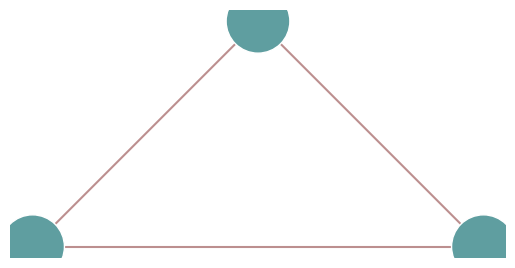

In [57]:
network.plot()

In [58]:
network.buses_t.p

Bus,My bus 0,My bus 1,My bus 2
snapshot,,,
now,100.34623,-100.0,0.0


In [59]:
network.lines_t.p0[network.lines[network.lines.bus0 == "My bus 0"].index]

,My line 0
snapshot,
now,66.897487


In [60]:
network.loads_t.p

Load,My load
snapshot,
now,100.0


In [61]:
network.generators_t.p

Generator,My gen
snapshot,
now,100.34623


In [62]:
network.lines

attribute,bus0,bus1,type,x,r,g,b,s_nom,s_nom_extendable,s_nom_min,...,v_ang_max,sub_network,x_pu,r_pu,g_pu,b_pu,x_pu_eff,r_pu_eff,s_nom_opt,v_nom
Line,,,,,,,,,,,,,,,,,,,,,
My line 0,My bus 0,My bus 1,,0.1,0.01,0.0,0.0,0.0,False,0.0,...,inf,0,0.00025,0.000025,0.0,0.0,0.00025,0.000025,0.0,20.0
My line 1,My bus 1,My bus 2,,0.1,0.01,0.0,0.0,0.0,False,0.0,...,inf,0,0.00025,0.000025,0.0,0.0,0.00025,0.000025,0.0,20.0
My line 2,My bus 2,My bus 0,,0.1,0.01,0.0,0.0,0.0,False,0.0,...,inf,0,0.00025,0.000025,0.0,0.0,0.00025,0.000025,0.0,20.0


In [63]:
network.lines_t.p0

,My line 0,My line 1,My line 2
snapshot,,,
now,66.897487,-33.333333,-33.391038


In [64]:
# what reaches bus1 ?
# 1. negative sum of power @ lines with bus as bus0 and p0 (Active power at bus0 (positive if branch is withdrawing power from bus0)
network.lines_t.p0[network.lines[network.lines.bus0 == "My bus 1"].index].sum(axis=1)
# 2. negative sum of power @ lines with bus as bus1 and p1 (Active power at bus1 (positive if branch is withdrawing power from bus1)
network.lines_t.p1[network.lines[network.lines.bus1 == "My bus 1"].index].sum(axis=1)

snapshot
now   -66.666667
dtype: float64

In [65]:
# in total -100 MW are active at bus My bus 1, which mean 100 MW are feed into the bus
network.lines_t.p0[network.lines[network.lines.bus0 == "My bus 1"].index].sum(axis=1) + network.lines_t.p1[network.lines[network.lines.bus1 == "My bus 1"].index].sum(axis=1)

snapshot
now   -100.0
dtype: float64

In [66]:
network.lines_t.p0[network.lines[network.lines.bus0 == "My bus 1"].index]

,My line 1
snapshot,
now,-33.333333


In [73]:
# aggregationfor bus 1
lines_sum = network.lines_t.p0[network.lines[network.lines.bus0 == "My bus 1"].index].sum(axis=1) + network.lines_t.p1[network.lines[network.lines.bus1 == "My bus 1"].index].sum(axis=1)
load_sum = network.loads_t.p.sum()
gen_sum = 0
gen_sum -load_sum.values - lines_sum.values

array([-4.7535309e-10])

In [78]:
network.buses_t.p

Bus,My bus 0,My bus 1,My bus 2
snapshot,,,
now,100.34623,-100.0,0.0


In [68]:
gens_index_direct = network.generators[network.generators.bus == "My bus 1"].bus.index
network.generators_t.p.loc["now", gens_index_direct]#.sum(axis=1)

Series([], Name: now, dtype: float64)

In [67]:
network.buses_t.marginal_price

Bus
snapshot
now


In [79]:
network.lines

attribute,bus0,bus1,type,x,r,g,b,s_nom,s_nom_extendable,s_nom_min,...,v_ang_max,sub_network,x_pu,r_pu,g_pu,b_pu,x_pu_eff,r_pu_eff,s_nom_opt,v_nom
Line,,,,,,,,,,,,,,,,,,,,,
My line 0,My bus 0,My bus 1,,0.1,0.01,0.0,0.0,0.0,False,0.0,...,inf,0,0.00025,0.000025,0.0,0.0,0.00025,0.000025,0.0,20.0
My line 1,My bus 1,My bus 2,,0.1,0.01,0.0,0.0,0.0,False,0.0,...,inf,0,0.00025,0.000025,0.0,0.0,0.00025,0.000025,0.0,20.0
My line 2,My bus 2,My bus 0,,0.1,0.01,0.0,0.0,0.0,False,0.0,...,inf,0,0.00025,0.000025,0.0,0.0,0.00025,0.000025,0.0,20.0


In [80]:
network.lines_t.p0

,My line 0,My line 1,My line 2
snapshot,,,
now,66.897487,-33.333333,-33.391038


In [81]:
network.lines_t.p1

,My line 0,My line 1,My line 2
snapshot,,,
now,-66.666667,33.391038,33.448743
